In [1]:
print("Something")

Something


In [7]:
import json

def add_mask_path_to_frames(input_file, output_file):
    # Read the JSON file
    with open(input_file, 'r') as file:
        data = json.load(file)

    # Process each frame in the data
    for frame in data.get("frames", []):
        # Extracting the file name from the file path
        file_name = frame["file_path"].split('/')[-1]
        
        # Constructing the mask path using the file name
        mask_name = file_name
        mask_path = f"masks/{mask_name}"

        # Adding the mask path to the frame data
        frame["mask_path"] = mask_path

    # Write the modified data to the output file
    with open(output_file, 'w') as file:
        json.dump(data, file, indent=4)

# Usage
input_file = '/work/mech-ai-scratch/arbab/NeRFs-in-the-Wild/data/nerfstudio/CCL-scanned-data-single/CCL-scannned-data-single-img-50-qual-90-processed-pixel-sampler/transforms-old.json'
output_file = '/work/mech-ai-scratch/arbab/NeRFs-in-the-Wild/data/nerfstudio/CCL-scanned-data-single/CCL-scannned-data-single-img-50-qual-90-processed-pixel-sampler/transforms.json'
add_mask_path_to_frames(input_file, output_file)

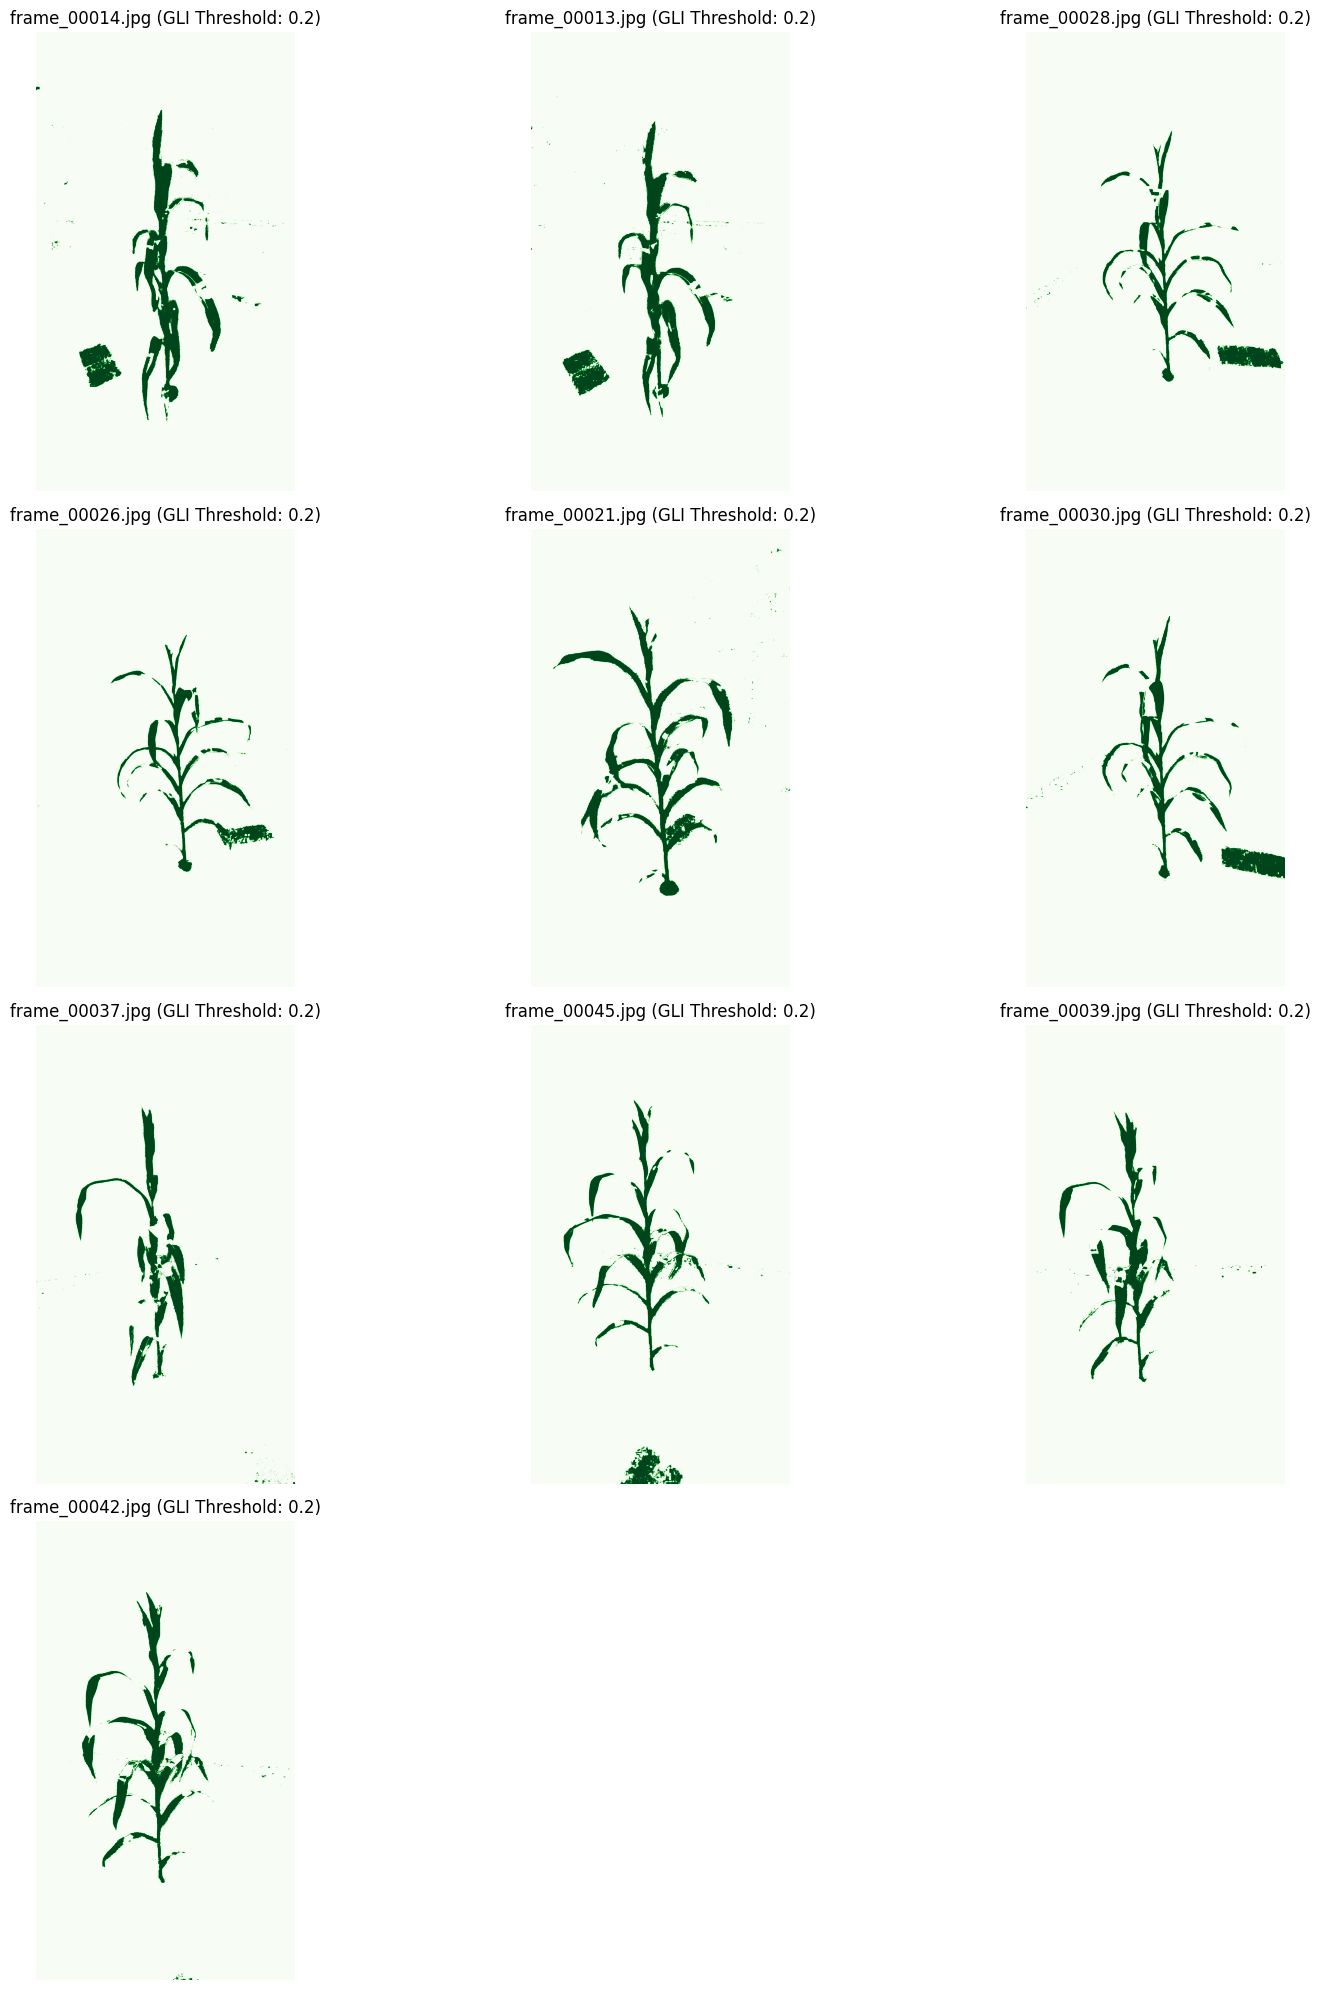

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path

def calculate_gli(image):
    R, G, B = cv2.split(image.astype('float'))
    sum_components = np.maximum(R + G + B, 1)
    GLI = (2 * G - R - B) / sum_components
    return GLI

def plot_gli_thresholded_images(images, threshold=0.2):
    num_images = len(images)
    cols = 3
    rows = num_images // cols + (num_images % cols > 0)
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
    axes = axes.flatten() if num_images > 1 else [axes]
    
    for ax, (image_path, gli_image) in zip(axes, images.items()):
        ax.imshow(gli_image, cmap='Greens')
        ax.set_title(f'{Path(image_path).name} (GLI Threshold: {threshold})')
        ax.axis('off')

    # Hide any remaining axes if there are fewer images than slots
    for ax in axes[len(images):]:
        ax.set_visible(False)

    plt.tight_layout()
    plt.show()

def process_images_from_folder(folder_path, threshold=0.2):
    image_files = [file for file in Path(folder_path).glob('*') if file.suffix.lower() in ['.jpg', '.png', '.jpeg']][0:10]
    
    thresholded_images = {}
    for image_file in image_files:
        image = cv2.imread(str(image_file))
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        gli_image = calculate_gli(image_rgb)
        gli_thresholded = np.where(gli_image > threshold, 1, 0)
        thresholded_images[str(image_file)] = gli_thresholded

    plot_gli_thresholded_images(thresholded_images, threshold)

# Example usage:
# Replace 'path_to_your_images_folder' with the actual path to your images folder
images_folder_path = '/work/mech-ai-scratch/arbab/NeRFs-in-the-Wild/data/nerfstudio/CCL-scanned-data-single/CCL-scannned-data-single-img-50-qual-90-processed/images'
process_images_from_folder(images_folder_path)

In [5]:
import cv2
import numpy as np
from pathlib import Path

def calculate_gli(image):
    R, G, B = cv2.split(image.astype('float'))
    sum_components = np.maximum(R + G + B, 1)
    GLI = (2 * G - R - B) / sum_components
    return GLI

def create_gli_mask(image, threshold=0.2):
    gli_image = calculate_gli(image)
    mask = np.where(gli_image > threshold, 1, 0).astype(np.uint8)
    return mask

def process_images_for_masks(source_folder, target_folder, threshold=0.2):
    source_path = Path(source_folder)
    target_path = Path(target_folder)
    target_path.mkdir(parents=True, exist_ok=True)

    for image_file in source_path.glob('*'):
        if image_file.suffix.lower() in ['.jpg', '.png', '.jpeg']:
            # Read image and convert to RGB
            image = cv2.imread(str(image_file))
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Create GLI based mask
            mask = create_gli_mask(image_rgb, threshold)

            # Save mask
            mask_file = target_path / image_file.name
            cv2.imwrite(str(mask_file), mask)

# Define source and target directories
source_dir = '/work/mech-ai-scratch/arbab/NeRFs-in-the-Wild/data/nerfstudio/CCL-scanned-data-single/CCL-scannned-data-single-img-50-qual-90-processed-pixel-sampler/images_8'
target_dir = '/work/mech-ai-scratch/arbab/NeRFs-in-the-Wild/data/nerfstudio/CCL-scanned-data-single/CCL-scannned-data-single-img-50-qual-90-processed-pixel-sampler/masks_8'

# Process images and generate masks
process_images_for_masks(source_dir, target_dir)


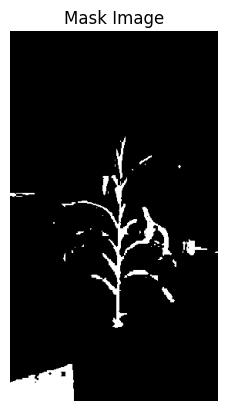

In [6]:
#Visualize
import cv2
import matplotlib.pyplot as plt

def display_mask(file_path):
    # Read the mask image
    mask = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)

    # Scale the mask values from 0-1 to 0-255 for display
    mask_display = mask * 255

    # Display the image
    plt.imshow(mask_display, cmap='gray')
    plt.title('Mask Image')
    plt.axis('off')
    plt.show()

# Example usage
file_path = '/work/mech-ai-scratch/arbab/NeRFs-in-the-Wild/data/nerfstudio/CCL-scanned-data-single/CCL-scannned-data-single-img-50-qual-90-processed-pixel-sampler/masks_8/frame_00001.jpg'  # Replace with your mask image file path
display_mask(file_path)
